# FIRING RATE INFORMATION

We want to implement a code that can tell us the information that a neuron can provide by studying its firing rate($r$) and then compare it with the information that can give multiple neurons.
The formula used to calculate the Information(Enthropy) will be:
$$
H(R)=-\sum_r{p(r)·log_2{(p(r)})}
$$
Where $r$ is the firing rate and $p(r)$ the probability of getting $r$ spikes for a given stimmulus $R$

We will first define some basic parameters and import the function for firing rate used in Week 2:


In [1]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

max_n = 150   # Maximum count 
max_r = 70    # Maximum rate 
rate  = np.arange(2, max_r)
countFR = np.arange(0,max_n)
countLK = np.linspace(0, 1, 300)
n_trials = 100
bins     = np.arange(0,max_n+1)-0.5

def myCurve(theta, theta_p = 0, c = 1.0, r_max = 30, K = 20, sigma = 60):
    A = c*r_max
    return A*np.exp(-0.5*(theta-theta_p)**2/(2*sigma**2)) + K


The first thing we want to study is the difference between the theoretical and simulated enthropy depending on the firing rate  
In order to to that what we'll do is generate two sets of trials that will generate different sets of firing rates with poisson distribution and also a theoretical firing rate given a particular firing rate and a maximum number of spikes.

We then calculate the probability of spiking for each firing rate and calculate the entropy of each distribution

In [2]:

entropy_pmf = np.zeros(len(rate))
entropy_hist2 = np.zeros(len(rate))
entropy_hist = np.zeros(len(rate))
probA = []
probB = []
for i, r in enumerate(rate):
    # Generate samples
    s1 = np.random.poisson(r,size=n_trials)
    s2 = np.random.poisson(r,size=n_trials)
    # Generate the probability mass function
    p_pmf = poisson.pmf(countFR,r)
    p1 = np.histogram(s1,bins,density = True)[0]
    p2 = np.histogram(s2,bins,density = True)[0]
    probA.append(p1)
    probB.append(p2)
    # Calculate the entropy
    H_pmf = -np.sum(p_pmf*np.log2(p_pmf))
    H1 = -np.sum(p1[p1>0]*np.log2(p1[p1>0]))
    H2 = -np.sum(p2[p2>0]*np.log2(p2[p2>0]))
    entropy_pmf[i] = H_pmf
    entropy_hist[i] = H1
    entropy_hist2[i] = H2

We can now plot the theoretical entropy and one of the simulated ones:

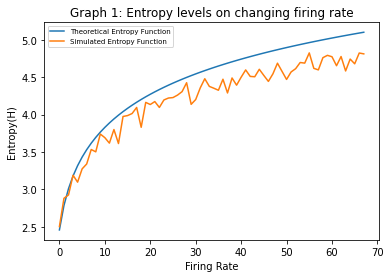

In [3]:
fig, ax = plt.subplots(1, 1)

ax.plot(entropy_pmf, label='Theoretical Entropy Function')
ax.plot(entropy_hist, label='Simulated Entropy Function')
ax.set_title('Graph 1: Entropy levels on changing firing rate')
ax.set_xlabel('Firing Rate')
ax.set_ylabel('Entropy(H)')
ax.legend(fontsize = 'x-small');


The next thing is going to be plotting the two simulated entropies with the mutual entropy:
$$
H(X, Y) = H(X) - H(X | Y)\\
H(X | Y) = -\sum_{x \in X, y \in Y}{p(x, y)·log_2{\frac{p(x, y)}{p(y)}}}
$$

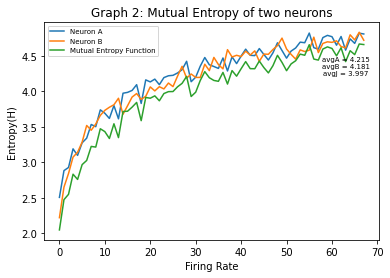

In [4]:
fig, ax = plt.subplots(1, 1)

ax.plot(entropy_hist, label='Neuron A')
ax.plot(entropy_hist2, label='Neuron B')

entropy_histj = np.zeros(len(rate))
for i, (pA, pB) in enumerate(zip(probA, probB)):
    p = pA*pB
    H = -np.sum(p[p>0]*np.log2(p[p>0]/pB[p>0]))
    entropy_histj[i] = H

entropy_histj = entropy_hist - entropy_histj

avgS = []
avgS.append(sum(entropy_hist)/len(entropy_hist))
avgS.append(sum(entropy_hist2)/len(entropy_hist2))
avgS.append(sum(entropy_histj)/len(entropy_histj))
avgS.append(avgS[0]+avgS[1]-avgS[2])
toSay = "avgA = {}".format('%.3f'%(avgS[0])) + '\n'
toSay += "avgB = {}".format('%.3f'%(avgS[1])) + '\n'
toSay += "avgJ = {}".format('%.3f'%(avgS[2]))
ax.text(0.9,0.8,toSay,horizontalalignment='center', fontsize = 'x-small',
     verticalalignment='center', transform = ax.transAxes)

ax.plot(entropy_histj, label='Mutual Entropy Function')
ax.set_title('Graph 2: Mutual Entropy of two neurons')
ax.set_xlabel('Firing Rate')
ax.set_ylabel('Entropy(H)')
ax.legend(fontsize = 'x-small');

Finally we want to see what happens if we calculate the entropy of two neurons coding an angle with increasing coherence, we expect to get increasing entropies as a increase in coherence brings about an increase in the probability of spiking

In the other hand, we should see a decrease in the conditional entropy $H(X|Y)$ as the two distributions start getting less and less related

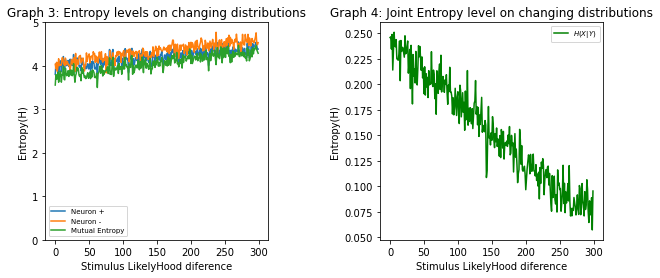

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))


entropy_dist1 = np.zeros(len(countLK))
entropy_dist2 = np.zeros(len(countLK))
entropy_distA = np.zeros(len(countLK))
entropy_distB = np.zeros(len(countLK))
KVD = []
for i, diff in enumerate(countLK):
    
    sA = np.random.poisson(myCurve(0, theta_p=90, c=diff),size=n_trials)
    sB = np.random.poisson(myCurve(0, theta_p=0, c=diff),size=n_trials)
    pA = np.histogram(sA,bins,density = True)[0]
    pB = np.histogram(sB,bins,density = True)[0]
    
    p = pA*pB
    KVD.append(np.sum(pA[(pB>0) & (pA>0)]*np.log2(pA[(pB>0) & (pA>0)]/pB[(pB>0) & (pA>0)])))

    Ha = -np.sum(pA[pA>0]*np.log2(pA[pA>0]))
    Hb = -np.sum(pB[pB>0]*np.log2(pB[pB>0]))
    H1 = -np.sum(p[p>0]*np.log2(p[p>0]/pB[p>0]))
    entropy_dist1[i] = H1
    entropy_distA[i] = Ha
    entropy_distB[i] = Hb

ax[0].plot(entropy_distA, label="Neuron +")
ax[0].plot(entropy_distB, label='Neuron -')
ax[0].plot(entropy_distA - entropy_dist1, label='Mutual Entropy')
#ax[0].plot(KVD, label="KVD")
ax[0].set_title('Graph 3: Entropy levels on changing distributions')
ax[0].set_xlabel('Stimulus LikelyHood diference')
ax[0].set_ylabel('Entropy(H)')
ax[0].legend(fontsize = 'x-small')
ax[0].set_ylim([0, 5])


ax[1].plot(entropy_dist1, color='g', label='$H(X|Y)$')
ax[1].set_title('Graph 4: Joint Entropy level on changing distributions')
ax[1].set_xlabel('Stimulus LikelyHood diference')
ax[1].legend(fontsize = 'x-small')
ax[1].set_ylabel('Entropy(H)')

plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.5)
plt.show()
